In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [3]:
final_df=pd.read_csv('SimplePie_MS_PerStep.csv')

In [4]:
filtered_poursyrup = final_df[final_df['Step'].str.strip() == 'Pour syrup']
filtered_poursyrup

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
8,C002,28,Pour syrup,107.383091,128.375084,97.672148,96.610705,134.679142,415.805498,345.384135,325.081398
19,C004,30,Pour syrup,49.543192,83.195782,106.694101,85.978718,144.538303,156.798251,0.000000,150.365591
30,C005,46,Pour syrup,57.859381,99.620427,208.978326,127.631988,228.119027,236.999938,0.000000,137.781302
41,C010,54,Pour syrup,201.509043,275.821954,448.316167,346.474933,566.009350,501.451404,421.137409,319.007055
54,C014,32,Pour syrup,65.534560,107.768708,198.079943,104.763839,220.986000,204.747386,137.001598,102.685641
65,C015,33,Pour syrup,193.263113,260.838161,279.699088,272.987460,227.375039,424.114480,438.506891,379.405247
76,C018,50,Pour syrup,70.586055,160.813435,155.813863,128.426135,178.764766,312.443413,208.918910,135.363181
87,C019,40,Pour syrup,57.807381,76.317682,34.719657,47.969389,36.482578,333.557224,240.517588,157.968698
98,C022,32,Pour syrup,141.039884,210.598673,193.390328,186.396613,198.685537,423.952220,328.404612,275.446742
109,C023,52,Pour syrup,118.802037,165.675059,149.336368,133.426612,178.515678,598.065636,369.515065,267.508558


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_poursyrup = filtered_poursyrup.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_poursyrup.select_dtypes(include=['float64', 'int64']).columns
filtered_poursyrup[numerical_cols] = filtered_poursyrup[numerical_cols].replace(0, np.nan)

filtered_poursyrup[numerical_cols] = imputer.fit_transform(filtered_poursyrup[numerical_cols])
filtered_poursyrup

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
8,C002,28.0,Pour syrup,107.383091,128.375084,97.672148,96.610705,134.679142,415.805498,345.384135,325.081398
19,C004,30.0,Pour syrup,49.543192,83.195782,106.694101,85.978718,144.538303,156.798251,156.697908,150.365591
30,C005,46.0,Pour syrup,57.859381,99.620427,208.978326,127.631988,228.119027,236.999938,137.001598,137.781302
41,C010,54.0,Pour syrup,201.509043,275.821954,448.316167,346.474933,566.009350,501.451404,421.137409,319.007055
54,C014,32.0,Pour syrup,65.534560,107.768708,198.079943,104.763839,220.986000,204.747386,137.001598,102.685641
65,C015,33.0,Pour syrup,193.263113,260.838161,279.699088,272.987460,227.375039,424.114480,438.506891,379.405247
76,C018,50.0,Pour syrup,70.586055,160.813435,155.813863,128.426135,178.764766,312.443413,208.918910,135.363181
87,C019,40.0,Pour syrup,57.807381,76.317682,34.719657,47.969389,36.482578,333.557224,240.517588,157.968698
98,C022,32.0,Pour syrup,141.039884,210.598673,193.390328,186.396613,198.685537,423.952220,328.404612,275.446742
109,C023,52.0,Pour syrup,118.802037,165.675059,149.336368,133.426612,178.515678,598.065636,369.515065,267.508558


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Syrup',
    'HeadCamera Distance': 'HeadCamera Distance - Add Syrup',
    'LeftElbow Distance': 'LeftElbow Distance - Add Syrup',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Syrup',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Syrup',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Syrup',
    'RightElbow Distance': 'RightElbow Distance - Add Syrup',
    'RightShoulder Distance': 'RightShoulder Distance - Add Syrup'
}

# Rename columns
filtered_poursyrup = filtered_poursyrup.rename(columns=new_column_names)
filtered_poursyrup

,Participant,Block Design Raw Score,Step,Chest Distance - Add Syrup,HeadCamera Distance - Add Syrup,LeftElbow Distance - Add Syrup,LeftShoulder Distance - Add Syrup,MotionControllerLeft Distance - Add Syrup,MotionControllerRight Distance - Add Syrup,RightElbow Distance - Add Syrup,RightShoulder Distance - Add Syrup
8,C002,28.0,Pour syrup,107.383091,128.375084,97.672148,96.610705,134.679142,415.805498,345.384135,325.081398
19,C004,30.0,Pour syrup,49.543192,83.195782,106.694101,85.978718,144.538303,156.798251,156.697908,150.365591
30,C005,46.0,Pour syrup,57.859381,99.620427,208.978326,127.631988,228.119027,236.999938,137.001598,137.781302
41,C010,54.0,Pour syrup,201.509043,275.821954,448.316167,346.474933,566.009350,501.451404,421.137409,319.007055
54,C014,32.0,Pour syrup,65.534560,107.768708,198.079943,104.763839,220.986000,204.747386,137.001598,102.685641
65,C015,33.0,Pour syrup,193.263113,260.838161,279.699088,272.987460,227.375039,424.114480,438.506891,379.405247
76,C018,50.0,Pour syrup,70.586055,160.813435,155.813863,128.426135,178.764766,312.443413,208.918910,135.363181
87,C019,40.0,Pour syrup,57.807381,76.317682,34.719657,47.969389,36.482578,333.557224,240.517588,157.968698
98,C022,32.0,Pour syrup,141.039884,210.598673,193.390328,186.396613,198.685537,423.952220,328.404612,275.446742
109,C023,52.0,Pour syrup,118.802037,165.675059,149.336368,133.426612,178.515678,598.065636,369.515065,267.508558


In [7]:
tracker_columns = ['Chest Distance - Add Syrup', 'HeadCamera Distance - Add Syrup', 'LeftElbow Distance - Add Syrup', 'LeftShoulder Distance - Add Syrup',
                   'RightElbow Distance - Add Syrup', 'RightShoulder Distance - Add Syrup', 'MotionControllerLeft Distance - Add Syrup',
                   'MotionControllerRight Distance - Add Syrup']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_poursyrup, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_poursyrup[block_design_col], filtered_poursyrup[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_poursyrup, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Syrup,0.306843,0.285938
1,HeadCamera Distance - Add Syrup,0.094714,0.747399
2,LeftElbow Distance - Add Syrup,0.198238,0.496899
3,LeftShoulder Distance - Add Syrup,0.233481,0.421771
4,RightElbow Distance - Add Syrup,0.067329,0.819108
5,RightShoulder Distance - Add Syrup,-0.072687,0.804955
6,MotionControllerLeft Distance - Add Syrup,0.154185,0.598689
7,MotionControllerRight Distance - Add Syrup,0.180617,0.536631


In [8]:
#filtered_poursyrup.to_csv('SimplePie_PourSyrup.csv',index=False)

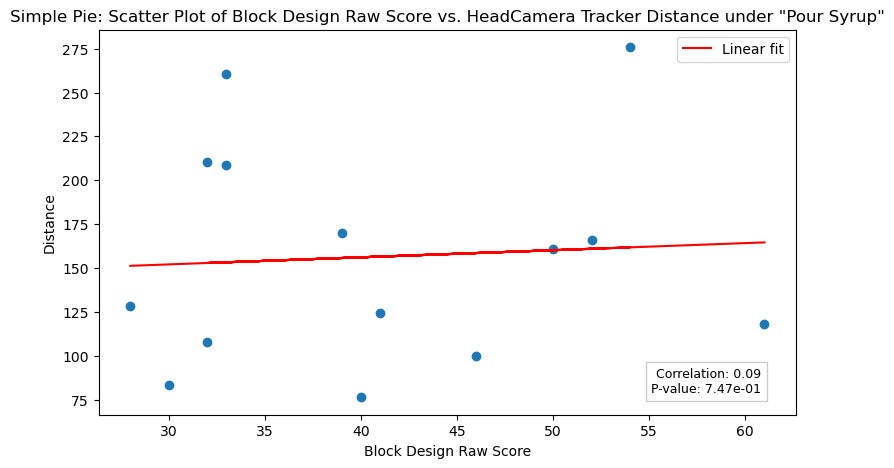

In [9]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['HeadCamera Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['HeadCamera Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['HeadCamera Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '57 SP_SyrupDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

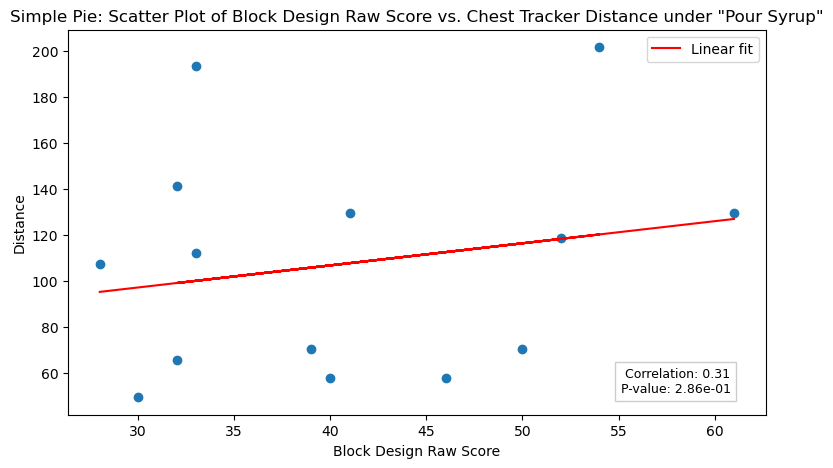

In [10]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['Chest Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['Chest Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['Chest Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '58 SP_SyrupDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

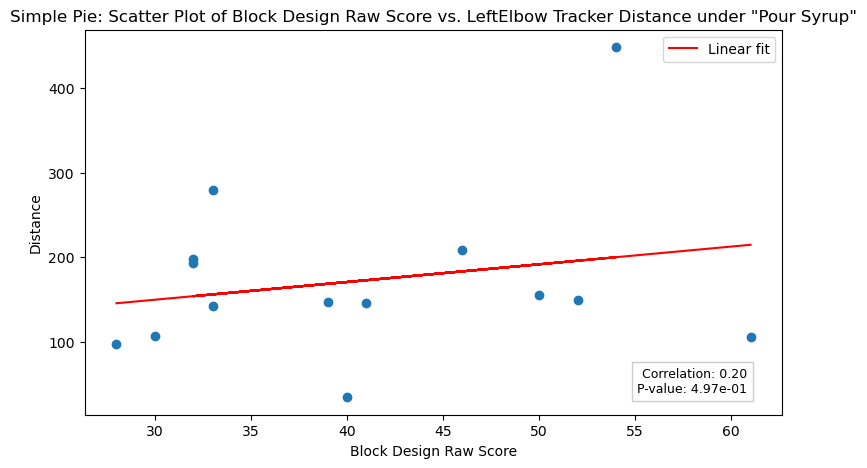

In [11]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftElbow Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftElbow Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftElbow Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '59 SP_SyrupDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

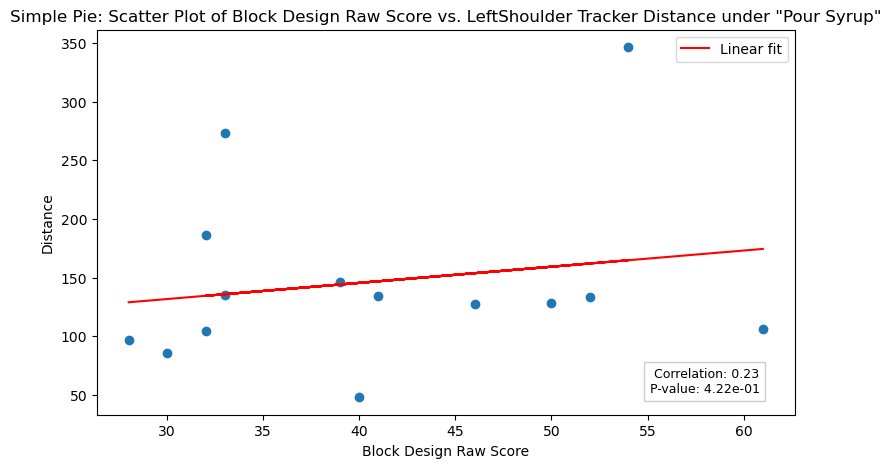

In [12]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftShoulder Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftShoulder Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftShoulder Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '60 SP_SyrupDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

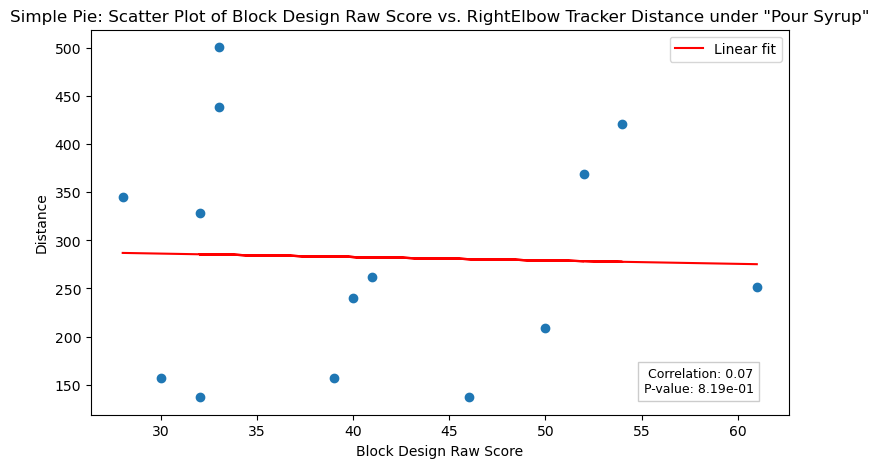

In [13]:
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightElbow Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightElbow Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightElbow Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '61 SP_SyrupDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

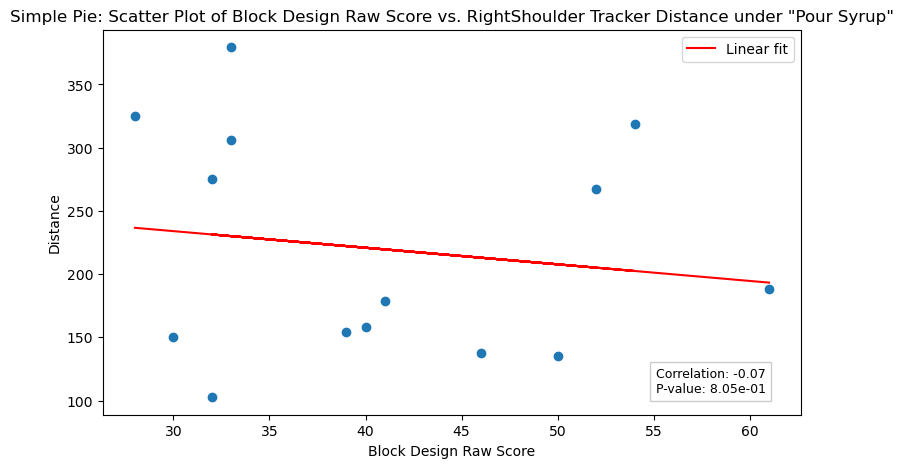

In [14]:
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightShoulder Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightShoulder Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightShoulder Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '62 SP_SyrupDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

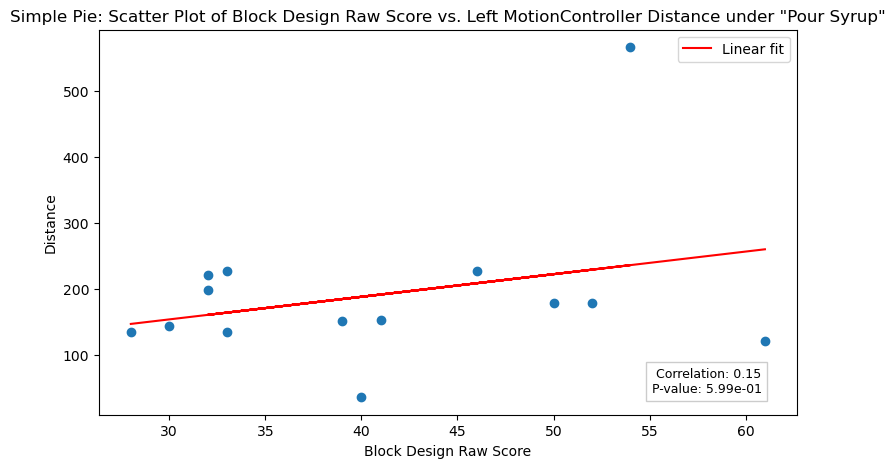

In [15]:
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerLeft Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerLeft Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerLeft Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '63 SP_SyrupDistanceLeftContlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

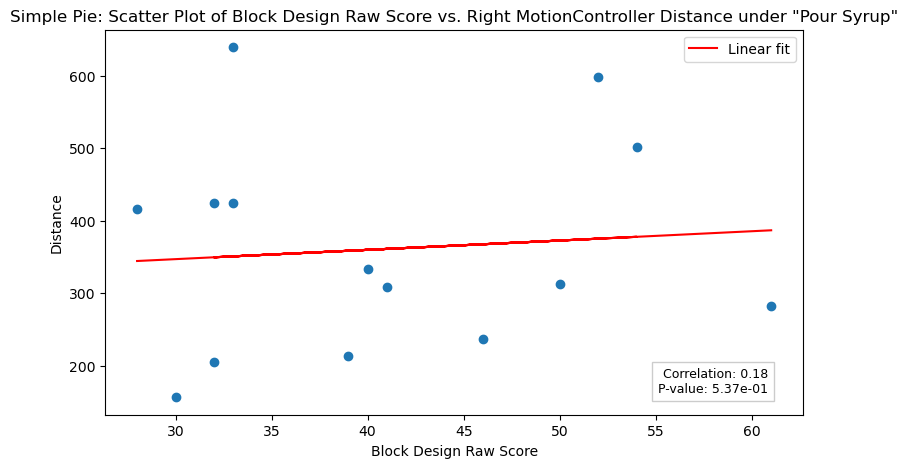

In [16]:
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerRight Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerRight Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerRight Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '64 SP_SyrupDistanceRightContlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()